# 4. Estimación Generalizada de Momentos (GMM)

El supuesto principal de MCO es que $E[\mathbf{x}_t \epsilon_t] = 0$. Si no se cumple este supuesto las estimaciones de los coeficientes del modelo no son consistentes. Un regresor que satisface esta restricción es conocido como **regresor exógeno**; en cambio, uno que no la satisface se le conoce como **regresor endógeno**. Veremos que el método de estimación GMM es una forma de lidiar con este problema de endogeineidad de los regresores.

### 4.1 Sesgo de endogeneidad. El ejemplo de Oferta y Demanda

Supongamos que deseamos modelar la curva de oferta y demanda del mercado de soya boliviano donde:

$$q^d_t = \alpha_0 + \alpha_1 p_t + u_t$$
$$q^s_t = \beta_0 + \beta_1 p_t + \nu_t$$
$$q^d_t = q^s_t \text{ condición de equilibrio de mercado}$$

donde $p_t$ es el precio internacional de la soya, $u_t$ son los factores que desplazan la curva de demanda por ejemplo el gusto por la soya, $\nu_t$ son los factores que desplazan la curva de oferta por ejemplo la cantidad de terrenos disponibles para cultivo de soya. Se asume que $E(u_t) = 0$ y $E(\nu_t) = 0$ y que $Cov(u_t, \nu_t) = 0$. Considerando el equilibrio de mercado $q_t = q^d_t = q^s_t$ podemos reescribir las ecuaciones como:

$$q_t = \alpha_0 + \alpha_1 p_t + u_t$$
$$q_t = \beta_0 + \beta_1 p_t + \nu_t$$

Podemos tratar este modelo como un sistema de dos ecuaciones y dos incógnitas $(p_t, q_t)$ y obtener sus valores:

$$p_t = \frac{\beta_0 - \alpha_0}{\alpha_1 - \beta_1} + \frac{\nu_t - u_t}{\alpha_1 - \beta_1}$$
$$q_t = \frac{\alpha_1 \beta_0 - \alpha_0 \beta_1}{\alpha_1 - \beta_1} + \frac{\alpha_1 \nu_t - \beta_1 u_t}{\alpha_1 - \beta_1}$$

Entonces el precio de la soya $p_t$ es función de los dos términos errores. Podemos calcular $Cov(p_t, u_t)$ y $Cov(p_t, \nu_t)$:

$$Cov(p_t, u_t) = -\frac{Var(u_t)}{\alpha_1 - \beta_1} \text{,  } Cov(p_t, \nu_t) = \frac{Var(\nu_t)}{\alpha_1 - \beta_1}$$

Como se puede observar, $p_t$ está correlacionada con ambos terminos errores (salvo que tanto $Var(u_t)$ y $Var(\nu_t)$ sean 0) por lo que $p_t$ es un regresor endógeno. 

El estimador MCO de $\alpha_1$ sería:

$$\hat{\alpha}_{1T} = \frac{Cov(p_T, q_T)}{Var(p_T)}$$

entonces:

$$plim_{T \to \infty} \hat{\alpha}_{1T} = \alpha_1 + \frac{Cov(p_t, u_t)}{Var(p_t)}$$

De igual forma para el estimador MCO de $\beta_1$:

$$plim_{T \to \infty} \hat{\beta}_{1T} = \beta_1 + \frac{Cov(p_t, \nu_t)}{Var(p_t)}$$

Por más que se incremente el tamaño de la muestra para estimar estos coeficientes, ambos estimadores son sesgados. Este sesgo se lo conoce como **sesgo de simultaneidad**.

La razón por la que no podemos estimar consistentemente ni la curva de oferta ni la de demanda es porque no sabemos si los cambios en $(p_t, q_t)$ se deben a un desplazamiento de la curva de oferta o a la curva de demanda. Esto sugiere que es posible estimar la curva de demanda (y de igual forma la curva de oferta) si algunos de los factores que mueven la curva de oferta (o la de demanda) son observables. Supongamos que la variable que mueve la curva de oferta $\nu_t$ se descompone en un factor observable $x_t$ y un factor no observable $\zeta_t$ que no está correlacionado con $x_t$. 

$$q_t = \beta_0 + \beta_1 p_t + \beta_2 x_t + \zeta_t$$

Ahora consideremos que $Cov(x_t, u_t) = 0$; puede considerarse $x_t$ la cantidad de terrenos disponibles para el cultivo de soya que no está correlacionada con factores que mueven la curva de demanda de soya como por ejemplo el gusto por la soya. Si se cumple esto, es posible extraer un componente del precio $p_t$ que esté correlacionado con la disponibilidad de terrenos y no con $u_t$. Entonces podemos estimar una curva de demanda con la cantidad de soya consumida y este componente del precio internacional de la soya.

Cuando una variable exógena (es decir que no esta relacionada con el término error) está relacionada con la variable endógena que consideramos en un modelo dado; se dice que esa variable es un **instrumento válido** para la variable endógena que analizamos. En este caso, la cantidad de terrenos disponibles para el cultivo de soya $x_t$ sería un instrumento válido para el precio internacional de la soya $p_t$ en la curva de demanda. Podemos ver esto más claramente si resolvemos el sistema de ecuaciones para $(p_t, q_t)$ con la nueva curva de oferta definida:

$$p_t = \frac{\beta_0 - \alpha_0}{\alpha_1 - \beta_1} + \frac{\beta_2}{\alpha_1 - \beta_1}x_t + \frac{\zeta_t - u_t}{\alpha_1 - \beta_1}$$
$$q_t = \frac{\alpha_1\beta_0 - \alpha_0\beta_1}{\alpha_1 - \beta_!} + \frac{\alpha_1 \beta_2}{\alpha_1 - \beta_1}x_t + \frac{\alpha_1 \zeta_t - \beta_1 u_t}{\alpha_1 - \beta_1}$$

Ya que $Cov(x_t, \zeta_t) = 0$ y $Cov(x_t, u_t) = 0$ se obtiene que:

$$Cov(x_t, p_t) = \frac{\beta_2}{\alpha_1 - \beta_1}Var(x_t) \neq 0$$

Entonces $x_t$ es un instrumento válido. Con esta información, podemos estimar $\alpha_1$ de manera consistente con el siguiente estimador:

$$\hat{\alpha}_{1T} = \frac{Cov(x_t, q_t)}{Cov(x_t, p_t)}$$

Este estimador se lo conoce como el **estimador de variables instrumentales** IV. Otra alternativa de estimador es el estimador de Mínimos Cuadrados en 2 etapas donde primero se efectúa la regresión de $p_t$ en $x_t$ y se obtiene el componente relacionado con $x_t$ pero no relacionado con $u_t$; llamémoslo $\hat{p}_t$. Luego, se estima la ecuación de demanda con las variables $q_t$ y $\hat{p}_t$. En el caso de un sólo instrumento, el estimador IV coincide con el estimador 2SLS. En el caso de que haya más instrumentos, se utiliza sólo el estimado 2SLS. 

### 4.2 Más ejemplos

Supongamos que se releva información de una muestra aleatoria de individuos (hombres y mujeres) de las principales capitales de Bolivia. Se pretende estudiar el efecto de los años de educación de los individuos en sus ingresos. La hipótesis es que a mayor años de educación, los individuos tienen mayores ingresos. Se plantea el siguiente modelo:

$$Y_i = \alpha_0 + \alpha_1 S_i + u_i$$

donde $Y_i$ es el nivel de ingresos del individuo $i$ y $S_i$ son los años de educación del individuo $i$. La hipótesis es que $\alpha_1 > 0$. 

Una variable que no es observable es la habilidad del individuo $A_i$. Individuos con mayor habilidad pueden tener mayores ingresos y tambien individuos con mayor habilidad pueden optar por un mayor tiempo de educación. Entonces bajo este planteamiento, no se satisface el requisito de $Cov(S_i, u_i) = 0$ que requiere MCO. Es necesario encontrar un instrumento válido $x_i$ donde $Cov(x_i, u_i) = 0$ y $Cov(S_i, x_i) \neq 0$. Una opción podría ser por ejemplo los años de educación del padre.

Otro ejemplo tiene relación con las variables medidas con error. Supongamos que nos planteamos la hipótesis que las personas consumen una fracción constante de sus ingresos. Es decir:

$$C^*_i = k Y^*_i \text{ donde 0 < k < 1}$$ 

Efectuamos la muestra aleatoria de individuos y recolectamos información sobre sus gastos de consumo y sus ingresos en el mes. Sin embargo, sabemos que las personas no dan un dato exacto de sus gastos de consumo y de sus ingresos por lo que consideramos que estas variables están medidas con error. Sean los valores observados $C_i$ y $Y_i$; entonces:

$$C_i = C^*_i + c_i \text{ y } Y_i = Y^*_i + y_i$$

donde $c_i$ y $y_i$ son los errores de medición y no están correlacionados entre ellos ni con los valores teóricos de consumo e ingreso $C^*_i$ y $Y^*_i$. Nos planteamos el siguiente modelo:

$$C_i = kY_i + u_i \text{ donde } u_i = c_i - ky_i$$

Se puede concluir que:

$$E(Y_i u_i) = -kE(y^2_i) < 0$$

por lo que $Y_i$ es una variable endógena en el modelo y no puede aplicarse MCO.

### 4.3 La formulación general

Se consideran los siguientes supuestos:

1. **Linearidad** La ecuación a estimar es lineal:
$$ y_t = \mathbf{z}'_t\mathbf{\delta} + \epsilon_t \text{ para } t = 1, 2, \dots, T$$
donde $\mathbf{z}_t$ es un vector de dimensión $L$ y lo mismo $\mathbf{\delta}$. $\epsilon_t$ es el término error.

2. **Estacionariedad ergódica** Sea $\mathbf{x}_t$ un vector de dimensión $K$ de instrumentos. El proceso conjunto $\{y_t, \mathbf{z}_t, \mathbf{x}_t\}$ es ergódico estacionario.

3. **Condición de ortogonalidad** Todas las variables consideradas en el vector $\mathbf{x}_t$ son exógenas ya que son ortogonales al término error. Es decir $E(x_{tk}\epsilon_t) = 0$ para todo $t$ y $k = 1, 2, \dots, K$. Esto puede ser expresado como:
$$E[\mathbf{x}_t(y_t - \mathbf{z}'_t\mathbf{\delta})] = \mathbf{0} \text{ o } E(\mathbf{g}_t) = \mathbf{0}$$

4. **Condición de rango para la identificación** La matrix $K \times L$ $E(\mathbf{x}_t\mathbf{z}'_t)$ es de rango columna completa; es decir su rango es igual a $L$. Esta es una condicion necesaria para identificar el vector de coeficientes $\mathbf{\delta}$.
Adicionalmente a la condición de rango para la identificación; está la **condición de orden** que nos dice que el números de instrumentos debe ser igual o mayor al número de regresores. Si $K > L$ se dice que el modelo está **sobreidentificado**. Si $K = L$ se dice que el modelo está **exactamente identificado**. En ambos casos la condición de rango debe cumplirse. 

5. **$\mathbf{g}_t$ es una martingala en diferencias con segundos momentos finitos** Esto es necesario para aplicar el Teorema de Límite Central para martingalas en diferencia. Podemos relajar este supuesto permitiendo correlación serial en $\mathbf{g}_t$ como lo hicimos en el capítulo anterior. 

### 4.4 Definición del Estimador Generalizado de Momentos (GMM)

De acuerdo a las condiciones de ortogonalidad, se considera que los momentos derivados de ellas tienen que ser 0. El **método de momentos** busca aquellos parámetros $\mathbf{\delta}$ tal que $E[\mathbf{g}_t(\mathbf{\delta})] = 0$.
Podemos definir el estimador de $E[\mathbf{g}_t(\mathbf{\delta})] = 0$ como:
 
$$\mathbf{g}_T(\mathbf{\tilde{\delta}}_T) = \frac{1}{T}\sum^T_{t = 1}\mathbf{g}_t(\mathbf{\tilde{\delta}}_T)$$

Desarrollando:

$$\mathbf{g}_T(\mathbf{\tilde{\delta}}_T) = \frac{1}{T}\sum^T_{t = 1}\mathbf{x}_t y_t - (\frac{1}{T}\sum^T_{t = 1}\mathbf{x}_t\mathbf{z}'_t)\mathbf{\tilde{\delta}}_T = 0$$

Luego se tiene que:

$$\mathbf{S}_{XZ}\mathbf{\tilde{\delta}}_T = \mathbf{s}_{XY}$$

Si $K = L$, entonces $\mathbf{S}_{XZ}$ es una matriz cuadrada e invertible por lo que el sistema de $K$ ecuaciones con $L$ incógnitas tiene una solución:

$$\mathbf{\tilde{\delta}}_{T, IV} = \mathbf{S}^{-1}_{XZ}\mathbf{s}_{XY}$$

Más aun, si $\mathbf{z}_t = \mathbf{x}_t$ entonces este estimador se reduce a MCO. ¿Qué sucede si $K > L$? Bueno en ese caso el sistema de ecuaciones no tiene solución pero podemos hallar un vector de coeficientes $\mathbf{\tilde{\delta}}$ que satisfaga en lo más posible todas las ecuaciones. Para ello definimos una matriz simétrica y positiva definida $\mathbf{W}$ que posee un estimador consistente $\mathbf{\hat{W}}_T$. El **estimador generalizado de momentos GMM** se define como:

$$\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}}_T) = argmin_{\mathbf{\tilde{\delta}}_T} J(\mathbf{\tilde{\delta}}_T, \mathbf{\hat{W}}_T)$$

donde:

$$J(\mathbf{\tilde{\delta}}_T, \mathbf{\hat{W}}_T) = T\mathbf{g}_T(\mathbf{\tilde{\delta}}_T)'\mathbf{\hat{W}}_T\mathbf{g}_T(\mathbf{\tilde{\delta}}_T)$$


En el caso específico del modelo lineal que estamos tratando, el estimador GMM sería:

$$\mathbf{\hat{\delta}}_{T, GMM}(\mathbf{\hat{W}}) = (\mathbf{S}'_{XZ}\mathbf{\hat{W}}\mathbf{S}_{XZ})^{-1}\mathbf{S}'_{XZ}\mathbf{\hat{W}}\mathbf{s}_{XY}$$

### 4.5 Propiedades asintóticas del estimador GMM

El esimador GMM tiene las siguientes propiedades asintóticas:

1. **Consistencia** El estimador GMM es consistente es decir $\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}})_T \stackrel{p}\to \mathbf{\delta}$.

2. **Normalidad asintótica** Se cumple que:
$$\sqrt{T}(\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}})_T - \mathbf{\delta}) \stackrel{d}\to N(\mathbf{0}, Avar(\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}})_T))$$
donde:
$$Avar(\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}})_T) = (\mathbf{\Sigma}'_{XZ}\mathbf{W}\mathbf{\Sigma}_{XZ})^{-1}\mathbf{\Sigma'_{XZ}}\mathbf{W}\mathbf{S}\mathbf{W}\mathbf{\Sigma}_{XZ}(\mathbf{\Sigma}'_{XZ}\mathbf{W}\mathbf{\Sigma}_{XZ})^{-1}$$ 

3. **Estimación consistente de $Avar(\mathbf{\hat{\delta}})_T(\mathbf{\hat{W}}_T)$** Asumiendo que se cuenta con un estimador consistente de $\mathbf{S}$ que llamaremos $\mathbf{\hat{S}}$; el estimador consistente de $Avar(\mathbf{\hat{\delta}})_T(\mathbf{\hat{W}}_T)$ sería:
$$\hat{Avar(\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}}_T))} = (\mathbf{S}'_{XZ}\mathbf{\hat{W}}_T \mathbf{S}_{XZ})^{-1}\mathbf{S}'_{XZ}\mathbf{\hat{W}}_T\mathbf{\hat{S}}\mathbf{\hat{W}}_T\mathbf{S}_{XZ}(\mathbf{S}'_{XZ}\mathbf{\hat{W}}_T\mathbf{S}_{XZ})^{-1}$$
Esta expresión un poco larga de la varianza asintótica del estimador GMM se reduce cuando veamos cómo escoger óptimamente $\mathbf{W}$.


La estimación consistente de la varianza del error sería:

$$\frac{1}{T}\sum^T_{t = 1}e^2_t \stackrel{p}\to E(\epsilon^2_t)$$

Las pruebas de hipótesis lineales se efectuarían de la siguiente forma:

1. Bajo la hipótesis nula $H_0: \delta_l = \bar{\delta}_l$
$$t_{lT} = \frac{\sqrt{T}(\hat{\delta}_{lT}(\mathbf{\hat{W}}_T) - \bar{\delta}_l)}{\sqrt{\hat{Avar(\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}}_T))_{ll}}}}\stackrel{d}\to N(0, 1)$$

2. Bajo la hipótesis nula $H_0: \mathbf{R}\mathbf{\delta} = \mathbf{r}$ donde $j$ es el número de restricciones (la dimensión de $\mathbf{r}$); entonces:
$$W_T = T(\mathbf{R}\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}}_T) - \mathbf{r})'[\mathbf{R}\hat{Avar(\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}}_T))}\mathbf{R}']^{-1}(\mathbf{R}\mathbf{\hat{\delta}}_T(\mathbf{\hat{W}}_T) - \mathbf{r}) \stackrel{d}\to \chi^2(j)$$

La prueba de hipótesis no lineal sería:

1. Bajo la hipótesis nula $H_0: \mathbf{a}(\mathbf{\delta}) = \mathbf{0}$ donde $\mathbf{A(\delta)}$ es la matriz $j \times L$ de primeras derivadas y $j$ es la dimensión de $\mathbf{a(.)}$; entonces:
$$W_t = T\mathbf{a(\hat{\delta}_T(\hat{W}_T))}'[\mathbf{A(\hat{\delta}_T(\hat{W}_T))}\hat{Avar(\mathbf{\hat{\delta}_T(\hat{W}_T)})}\mathbf{A(\hat{\delta}_T(\hat{W}_T))}']^{-1}\mathbf{a(\hat{\delta}_T(\hat{W}_T))} \stackrel{d}\to \chi^2(j)$$


Con respecto a la estimación consistente de $\mathbf{S}$ consideramos el siguiente supuesto que $E[(x_{tk}z_{tl})^2]$ existe y est finoto para todo $k = 1, 2, \dots, K$ y todo $l = 1, 2, \dots, L$. El estimador sería:

$$\mathbf{\hat{S}} = \frac{1}{T}\sum^T_{t = 1}e^2_t\mathbf{x}_t\mathbf{x}'_t$$

También se puede relajar el supuesto de no correlación serial en $\mathbf{g}_t$ y el estimador consistente de $\mathbf{S}$ sería:

$$\mathbf{\hat{S}} = \sum^\infty_{j = -\infty}\mathbf{\hat{\Gamma}}_j$$

Puede ser estimado en base a kerneles o usando el estimador VARHAC.

Finalmente se considera la eleción óptima de $\mathbf{\hat{W}}_T = \mathbf{\hat{S}}^{-1}$ con lo cual la varianza del estimador GMM alcanza un límite inferior:

$$\hat{Avar(\mathbf{\hat{\delta}_T(\hat(S)^{-1})})} = (\mathbf{S_{XZ}\hat{S}^{-1}S_{XZ}})^{-1}$$

El procedimiento para esta estimación eficiente GMM sería en dos etapas:

1. Escoger una matriz positiva definida y simétrica $\mathbf{\hat{W}}$ para realizar la estimación GMM. Posibles elecciones son la matriz identidd $mathbf{I}$ o la matriz $\mathbf{S}^{-1}_{XX}$. Bajo esta última se obtiene el estimador 2SLS. Con los resultados obtenidos, estimar $\mathbf{\hat{S}}^{-1}$.

2. Con esa estimación volver a estimar el modelo por GMM usando $\mathbf{\hat{W}} = \mathbf{\hat{S}}^{-1}$. Los resultados es el estimador eficiente GMM.

### 4.6 Prueba de hipótesis sobre las restricciones de sobreidentificación

Si el modelo está exactamente identificado $K = L$; entonces podemos aplicar el estimador IV $\mathbf{\hat{\delta}}_{T, IV}$ donde la distancia que definimos para el estimador GMM:

$$J(\mathbf{\tilde{\delta}}_T, \mathbf{\hat{W}}_T) = T\bar{\mathbf{g}}_T(\mathbf{\tilde{\delta}}_T)'\mathbf{\hat{W}}_T \bar{\mathbf{g}}_T(\mathbf{\tilde{\delta}}_T)$$

es exactamente 0. Sin embargo, si tenemos un modelo sobreidentificado $K > L$ esta distancia no es 0, pero nos gustaría que esté lo más cercana a 0. Afortunadamente, si empleamos el estimador eficiente GMM entonces esta distancia bajo la hipótesis nula de que es 0 sigue una distribución $\chi^2$ con $K - L$ grados de libertad. 

$$J(\mathbf{\hat{\delta}}_T(\mathbf{\hat{S}}^{-1}), \mathbf{\hat{S}}^{-1}) = T\mathbf{\bar{g}}_T(\mathbf{\hat{\delta}}_T(\mathbf{\hat{S}}^{-1}))'\mathbf{\hat{S}}^{-1}\mathbf{\bar{g}}_T(\mathbf{\hat{\delta}}_T(\mathbf{\hat{S}}^{-1})) \stackrel{d}\to \chi^2(K - L)$$

Esta es una prueba que nos permite evaluar la exogeneidad de los instrumentos que estamos utilizando en nuestro modelo.

Si consideramos que de los $K$ instrumentos incluidos en nuestro modelo; $K_1 > L$ cumplen con el supuesto de exogeneidad y $K - K_1$ no cumplen entonces podemos calcular el siguiente estadístico bajo la hipótesis nula que todos los instrumentos cumplen con el supuesto de exogeneidad:

$$C_T = J_T - J_{1T} \stackrel{d}\to \chi^2(K - K_1)$$ 

### 3.7 Implicaciones del supuesto de varianza condicional homoscedástica

Al igual que en la derivación de las propiedades del estimador MCO, para el caso del estimador GMM no utilizamos el supuesto de varianza condicional homoscedástica. Si incluimos este supuesto:

$$E(\epsilon^2_t | \mathbf{x}_t) = \sigma^2$$

Entonces el estimador eficiente GMM se convierte en el estimador 2SLS.

### 3.8 Aplicación Retornos de Educación

Es muy estudiado el tema de la relación de los salarios con los años de educación. La hipótesis es que a más años de educación un individuo debería percebir un mayor salario. Podemos observar los datos de una encuesta de hogares del año 1969 y ver la relación del logaritmo de salarios de cada individuo con respecto a sus años de educación:

In [4]:
if (!file.exists("./Datos/wage.xls")) {
    url <- "http://fhayashi.fc2web.com/hayashi%20econometrics/ch3/grilic.xls"
    download.file(url, destfile = "./Datos/wage.xls", mode = "wb")
}

In [5]:
library(readxl)

In [6]:
datos <- read_xls("./Datos/wage.xls", sheet = 1, range = "A1:T759")

In [8]:
tail(datos)

RNS,RNS80,MRT,MRT80,SMSA,SMSA80,MED,IQ,KWW,YEAR,AGE,AGE80,S,S80,EXPR,EXPR80,TENURE,TENURE80,LW,LW80
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,12,82,27,73,24,32,12,12,2.817,8.733,0,2,5.687,6.175
1,1,1,1,1,1,8,113,45,71,26,35,16,16,0.000,8.205,1,10,6.023,7.274
1,1,1,1,0,0,7,93,39,67,22,35,12,12,0.692,10.737,1,3,5.176,6.469
1,1,1,1,0,0,12,101,38,73,25,33,12,12,4.828,10.589,0,5,5.784,6.467
1,1,1,1,0,0,7,100,33,73,23,31,12,12,2.489,9.004,2,3,5.628,6.168
1,1,1,1,1,1,8,102,32,68,19,31,12,13,0.277,9.834,1,3,5.075,7.092


In [9]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



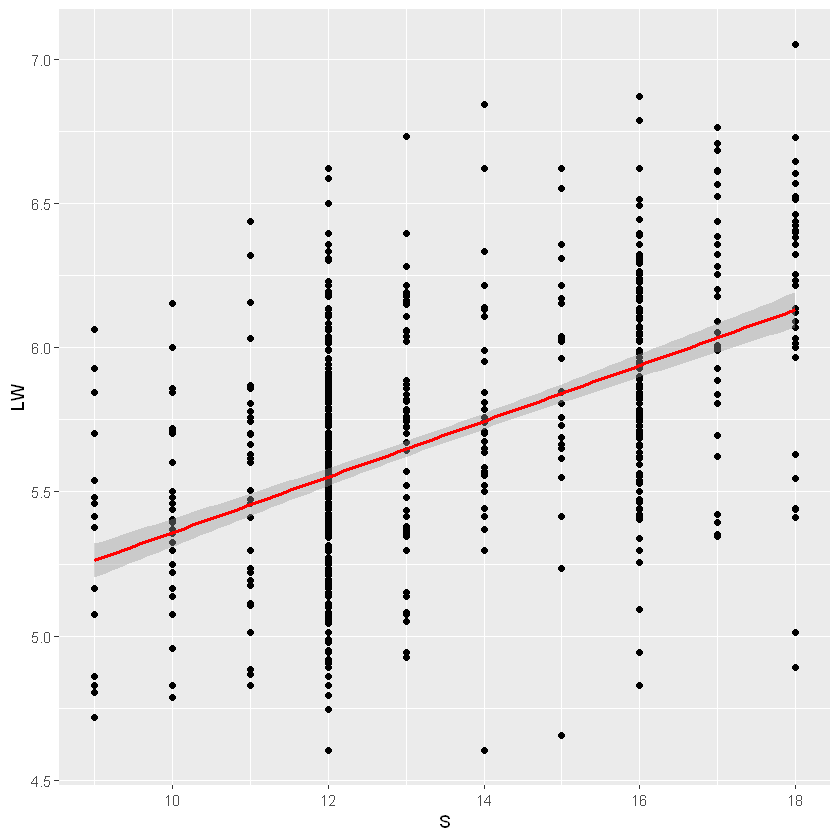

In [10]:
g <- ggplot(data = datos, aes(x = S, y = LW))
g + geom_point() + stat_smooth(method = "lm", colour = "red")

Planteamos el siguiente modelo:

$$LW_i = \alpha_0 + \alpha_1 S_i + \alpha_2 AGE_i + \alpha_3 AGE^2_i + \alpha_4 EXPR_i + \alpha_5 A_i + \epsilon_i$$

donde $LW_i$ es el logaritmo de los salarios de cada individuo, $S_i$ son los años de educación, $AGE_i$ es la edad del individuo, $EXPR_i$ son los años de experiencia del individuo y $A_i$ es la habilidad del individuo. Lamentablemente no observamos la habilidad $A_i$ del individuo por lo que la omitimos y estimamos el modelo por MCO.

In [13]:
# install.packages("gmm")
library(gmm)

Warning message:
"package 'gmm' was built under R version 4.0.3"
Loading required package: sandwich



In [14]:
datos$AGE2 <- datos$AGE^2

In [15]:
ols_mod <- gmm(LW ~ S + AGE + AGE2 + EXPR, ~ S + AGE + AGE2 + EXPR, data = datos)

In [16]:
summary(ols_mod)


Call:
gmm(g = LW ~ S + AGE + AGE2 + EXPR, x = ~S + AGE + AGE2 + EXPR, 
    data = datos)


Method:  twoStep 

Kernel:  Quadratic Spectral

Coefficients:
             Estimate     Std. Error   t value      Pr(>|t|)   
(Intercept)   4.8285e+00   5.2669e-01   9.1678e+00   4.8277e-20
S             6.7839e-02   7.8044e-03   8.6925e+00   3.5463e-18
AGE          -5.7344e-02   4.9480e-02  -1.1589e+00   2.4649e-01
AGE2          2.4511e-03   1.0962e-03   2.2360e+00   2.5350e-02
EXPR          6.0603e-03   7.4528e-03   8.1315e-01   4.1613e-01

J-Test: degrees of freedom is 0 
                J-test               P-value            
Test E(g)=0:    3.4581213140989e-21  *******            


Obtenemos que por año de educación adicional incrementamos el salario en un 6,8%. Sin embargo, existe la teoría que argumenta que los individuos utilizan su educación como señal a los empleadores de la habilidad que poseen. En otras palabras, $Cov(S_i, A_i) \neq 0$ por lo que al no haber incluido esta variable en la regresión ha generado un sesgo en mis estimaciones. Supongamos que contamos con una variables *proxy* de habilidad que es el $IQ_i$ y la incluimos en la regresión:

In [17]:
ols_mod2 <- gmm(LW ~ S + AGE + AGE2 + EXPR + IQ, ~ S + AGE + AGE2 + EXPR + IQ, data = datos)
summary(ols_mod2)


Call:
gmm(g = LW ~ S + AGE + AGE2 + EXPR + IQ, x = ~S + AGE + AGE2 + 
    EXPR + IQ, data = datos)


Method:  twoStep 

Kernel:  Quadratic Spectral

Coefficients:
             Estimate     Std. Error   t value      Pr(>|t|)   
(Intercept)   4.4186e+00   5.2693e-01   8.3855e+00   5.0513e-17
S             5.2577e-02   8.2875e-03   6.3442e+00   2.2362e-10
AGE          -4.6383e-02   4.8938e-02  -9.4780e-01   3.4323e-01
AGE2          2.2352e-03   1.0825e-03   2.0649e+00   3.8935e-02
EXPR          6.3878e-03   7.3365e-03   8.7069e-01   3.8392e-01
IQ            4.6172e-03   1.0954e-03   4.2151e+00   2.4968e-05

J-Test: degrees of freedom is 0 
                J-test                P-value             
Test E(g)=0:    4.16265886345753e-21  *******             


Nuestra nueva estimación arroja un retorno por educación del 5,2%. Es muy probable que haya habido una relación directa con habilidad y años de educación y nuestra primera estimación estaba inflada. Sin embargo, aún tenemos problemas. Es muy probable que nuestra medida de habilidad sea imperfecta:

$$IQ_i = \phi + A_i + \eta_i$$

Es decir tenemos una variable medida con error. Si introducimos $IQ_i$ en la regresión y estimamos por MCO los resultados serán sesgados. Por fortuna, contamos con el resultado de otro test $KWW_i$ que podemos usar como un instrumento: 

In [18]:
iv_mod <- gmm(LW ~ S + AGE + AGE2 + EXPR + IQ, ~ S + AGE + AGE2 + EXPR + KWW, data = datos)
summary(iv_mod)


Call:
gmm(g = LW ~ S + AGE + AGE2 + EXPR + IQ, x = ~S + AGE + AGE2 + 
    EXPR + KWW, data = datos)


Method:  twoStep 

Kernel:  Quadratic Spectral

Coefficients:
             Estimate     Std. Error   t value      Pr(>|t|)   
(Intercept)   4.3782e+00   6.9471e-01   6.3022e+00   2.9340e-10
S             5.1075e-02   1.7622e-02   2.8984e+00   3.7506e-03
AGE          -4.5305e-02   5.0647e-02  -8.9452e-01   3.7104e-01
AGE2          2.2139e-03   1.1114e-03   1.9919e+00   4.6377e-02
EXPR          6.4200e-03   7.3266e-03   8.7626e-01   3.8089e-01
IQ            5.0717e-03   4.8738e-03   1.0406e+00   2.9806e-01

J-Test: degrees of freedom is 0 
                J-test                P-value             
Test E(g)=0:    4.07286788970114e-21  *******             


Nuestro retorno por educación disminuye en algo a 5,1%. Podemos ver que sucedería si contamos además con la educación de la madre como instrumento:

In [20]:
gmm_mod <- gmm(LW ~ S + AGE + AGE2+ EXPR + IQ, ~ S + AGE + AGE2 + EXPR + KWW + MED, data = datos)
summary(gmm_mod)


Call:
gmm(g = LW ~ S + AGE + AGE2 + EXPR + IQ, x = ~S + AGE + AGE2 + 
    EXPR + KWW + MED, data = datos)


Method:  twoStep 

Kernel:  Quadratic Spectral(with bw =  0.81809 )

Coefficients:
             Estimate     Std. Error   t value      Pr(>|t|)   
(Intercept)   3.9992e+00   6.6536e-01   6.0106e+00   1.8484e-09
S             3.8412e-02   1.6282e-02   2.3592e+00   1.8313e-02
AGE          -3.0276e-02   5.0515e-02  -5.9935e-01   5.4894e-01
AGE2          1.9089e-03   1.1107e-03   1.7187e+00   8.5671e-02
EXPR          5.7805e-03   7.4020e-03   7.8093e-01   4.3484e-01
IQ            8.6356e-03   4.5050e-03   1.9169e+00   5.5255e-02

J-Test: degrees of freedom is 1 
                J-test    P-value 
Test E(g)=0:    3.114857  0.077581

Initial values of the coefficients
 (Intercept)            S          AGE         AGE2         EXPR           IQ 
 4.125998973  0.041684578 -0.038560802  0.002081085  0.006621527  0.007912530 


El retorno por educación esta en 3,8%.